In [29]:
import polars as pl 
from mix_n_match.correlations import calculate_variogram
from mix_n_match.main import ResampleData
import matplotlib.pyplot as plt

path = '/Users/yousefnami/Desktop/Main/2.Personal/MyStuff/2.Extracurriculars/Coding/DataScience/personal-data-analysis/data/garmin/sleep_data.csv'


def plot_variogram(df_variogram, direction):
    plt.plot(range(df_variogram.shape[0]), df_variogram.select(pl.col(direction)))
    

In [34]:
df = pl.read_csv(path).with_columns(
    pl.col("sleepStartTimestampGMT").str.strptime(pl.Datetime),
    pl.col("sleepEndTimestampGMT").str.strptime(pl.Datetime),
    pl.col("calendarDate").str.strptime(pl.Date)
)
df.head()

sleepStartTimestampGMT,sleepEndTimestampGMT,calendarDate,sleepWindowConfirmationType,deepSleepSeconds,lightSleepSeconds,remSleepSeconds,awakeSleepSeconds,unmeasurableSeconds,averageRespiration,lowestRespiration,highestRespiration,retro,timeDiff,totalTimeInBedAfterSleepOnset
"datetime[μs, UTC]","datetime[μs, UTC]",date,str,f64,f64,f64,f64,f64,f64,f64,f64,bool,f64,f64
2022-05-09 22:00:00 UTC,2022-05-10 06:00:00 UTC,2022-05-10,"""UNCONFIRMED""",null,null,null,null,null,null,null,null,false,28800.0,0.0
2022-05-10 22:20:00 UTC,2022-05-11 06:23:00 UTC,2022-05-11,"""ENHANCED_CONFI…",2760.0,16920.0,9060.0,240.0,0.0,14.0,10.0,19.0,false,28980.0,28980.0
2022-05-11 21:37:00 UTC,2022-05-12 07:22:00 UTC,2022-05-12,"""ENHANCED_CONFI…",6900.0,20220.0,7560.0,420.0,0.0,14.0,10.0,26.0,false,35100.0,35100.0
2022-05-12 22:10:00 UTC,2022-05-13 06:25:00 UTC,2022-05-13,"""ENHANCED_CONFI…",4440.0,19860.0,5280.0,120.0,0.0,15.0,11.0,26.0,false,29700.0,29700.0
2022-05-13 22:16:00 UTC,2022-05-14 03:29:00 UTC,2022-05-14,"""ENHANCED_CONFI…",5160.0,12360.0,1200.0,60.0,0.0,13.0,9.0,17.0,false,18780.0,18780.0


shape: (18, 4)
┌─────────────────────┬─────────────────────┬──────────────┬───────────────────────────────┐
│ _lower_boundary     ┆ _upper_boundary     ┆ calendarDate ┆ totalTimeInBedAfterSleepOnset │
│ ---                 ┆ ---                 ┆ ---          ┆ ---                           │
│ datetime[ms]        ┆ datetime[ms]        ┆ date         ┆ f64                           │
╞═════════════════════╪═════════════════════╪══════════════╪═══════════════════════════════╡
│ 2022-05-01 00:00:00 ┆ 2022-06-01 00:00:00 ┆ 2022-05-01   ┆ 27638.571429                  │
│ 2022-06-01 00:00:00 ┆ 2022-07-01 00:00:00 ┆ 2022-06-01   ┆ 27152.142857                  │
│ 2022-07-01 00:00:00 ┆ 2022-08-01 00:00:00 ┆ 2022-07-01   ┆ 27960.0                       │
│ 2022-08-01 00:00:00 ┆ 2022-09-01 00:00:00 ┆ 2022-08-01   ┆ 26040.0                       │
│ …                   ┆ …                   ┆ …            ┆ …                             │
│ 2023-07-01 00:00:00 ┆ 2023-08-01 00:00:00 ┆ 2023-07-0

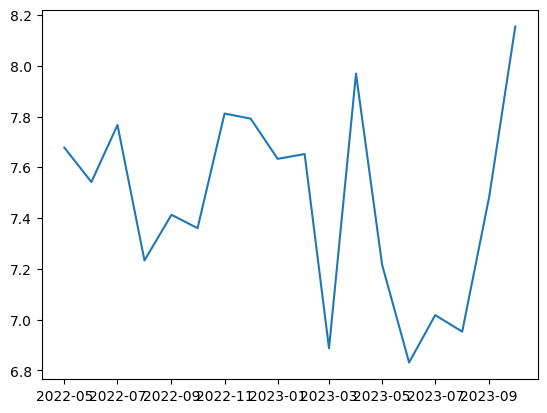

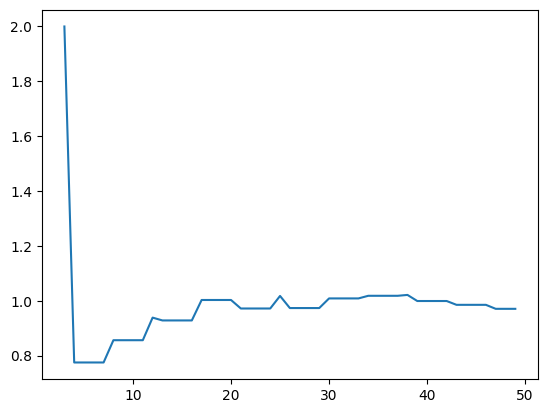

In [38]:
processor = ResampleData(
    "calendarDate", "1mo", "mean", ["totalTimeInBedAfterSleepOnset"], 
)

df = processor.transform(df)

lazy_variogram = calculate_variogram(
    df.lazy(),
    "calendarDate",
    number_of_lags=50,
    lag_size="7d",
    delta="1m",
    target_col="totalTimeInBedAfterSleepOnset"
)

plt.plot(df.select(pl.col("calendarDate")), df.select(pl.col("totalTimeInBedAfterSleepOnset") / 3600))
plt.figure()
plot_variogram(lazy_variogram.collect(), "calendarDate")